# Exercise 2: Getting to know...
## Geographic Information Systems 1 Lab
### GEOG 3150

Due to a dependency issue, the following script had to be used to ensure that the _ggsn_ and _ggspatial_ packages would load correctly.

In [1]:
system('sudo add-apt-repository ppa:ubuntugis/ubuntugis-unstable')
system('sudo apt-get update')
system('sudo apt-get install libudunits2-dev libgdal-dev libgeos-dev libproj-dev')

In [11]:
packages<-c("tidyverse","maps","ggsn")
sapply(packages, install.packages, character.only=TRUE)
sapply(packages, require, character.only=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



$tidyverse
NULL

$maps
NULL

$ggsn
NULL

tidyverse      maps      ggsn 
     TRUE      TRUE      TRUE

In [12]:
evs <- read.csv('https://raw.githubusercontent.com/chrismgentry/GIS1-Exercise-2/main/Data/ev_stations.csv')
head(evs)

,State,Abbreviation,EVS_Count
,<chr>,<chr>,<int>
1,alabama,AL,426
2,arizona,AZ,1840
3,arkansas,AR,353
4,california,CA,32601
5,colorado,CO,3042
6,connecticut,CT,1165


In [60]:
us <- map_data('state')
world <- map_data('world', region = c("Canada","Mexico"))

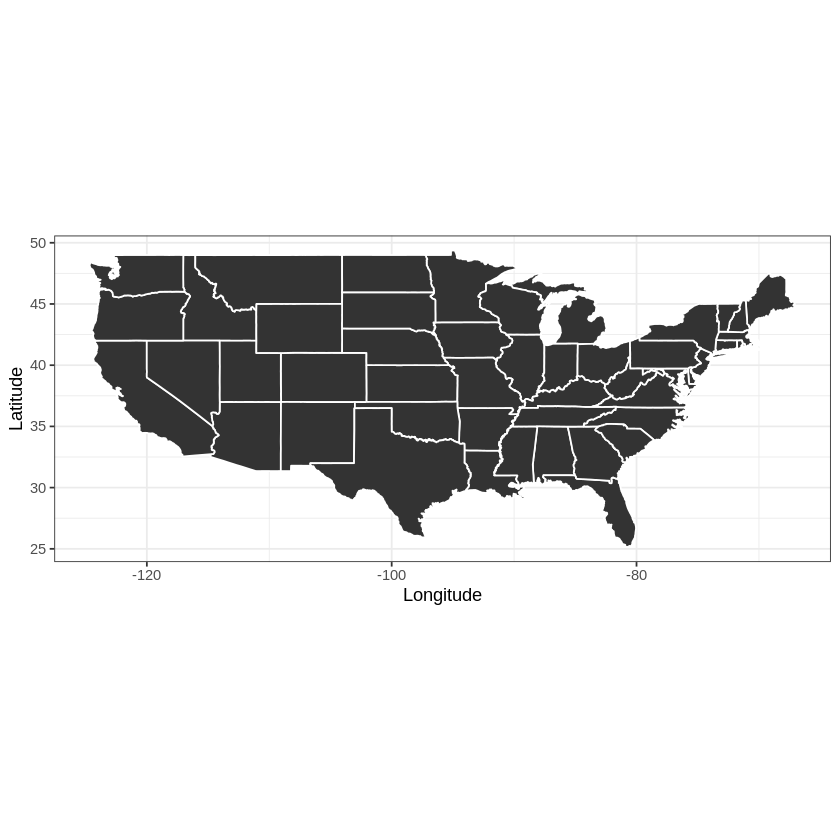

In [14]:
ggplot(us) + geom_polygon(aes(x=long, y=lat, group=group), color="white") + coord_fixed(1.0) + theme_bw() + labs(x="Longitude",y="Latitude")

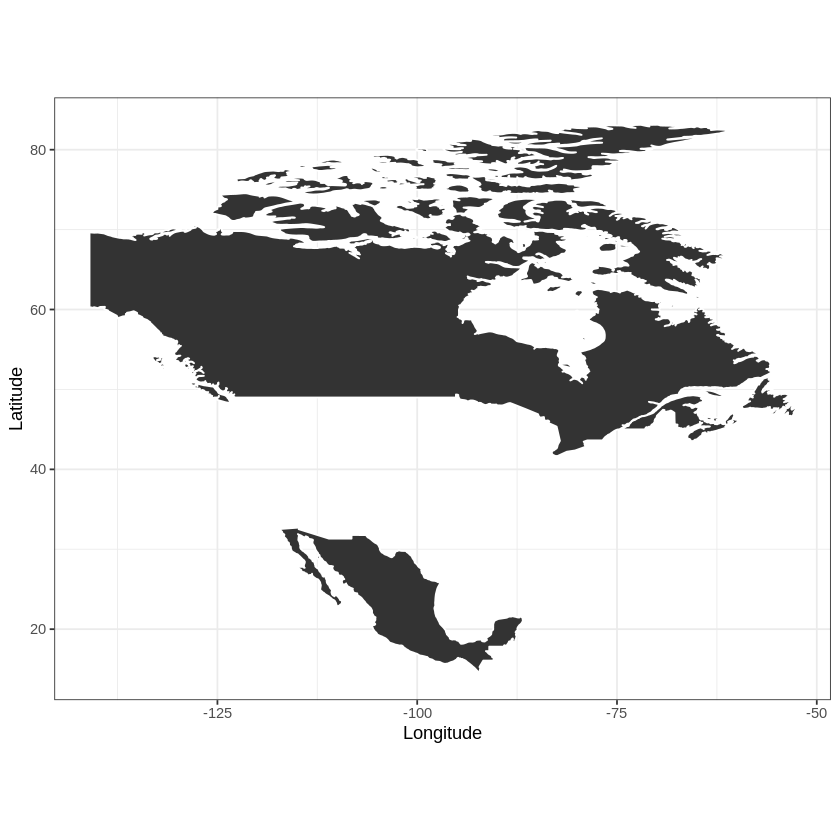

In [15]:
ggplot(world) + geom_polygon(aes(x=long, y=lat, group=group), color="white") + coord_fixed(1.0) + theme_bw() + labs(x="Longitude",y="Latitude")

In [61]:
head(us)

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-87.46201,30.38968,1,1,alabama,NA
2,-87.48493,30.37249,1,2,alabama,NA
3,-87.52503,30.37249,1,3,alabama,NA
4,-87.53076,30.33239,1,4,alabama,NA
5,-87.57087,30.32665,1,5,alabama,NA
6,-87.58806,30.32665,1,6,alabama,NA


In [17]:
unique(us$region)

[1] "alabama"              "arizona"              "arkansas"            
 [4] "california"           "colorado"             "connecticut"         
 [7] "delaware"             "district of columbia" "florida"             
[10] "georgia"              "idaho"                "illinois"            
[13] "indiana"              "iowa"                 "kansas"              
[16] "kentucky"             "louisiana"            "maine"               
[19] "maryland"             "massachusetts"        "michigan"            
[22] "minnesota"            "mississippi"          "missouri"            
[25] "montana"              "nebraska"             "nevada"              
[28] "new hampshire"        "new jersey"           "new mexico"          
[31] "new york"             "north carolina"       "north dakota"        
[34] "ohio"                 "oklahoma"             "oregon"              
[37] "pennsylvania"         "rhode island"         "south carolina"      
[40] "south dakota"         "tennessee"            "texas"               
[43] "utah"                 "vermont"              "virginia"            
[46] "washington"           "west virginia"        "wisconsin"           
[49] "wyoming"

In [18]:
colnames(evs) <- c("region","abbr","evs_count")
states <- inner_join(us, evs, by = "region")

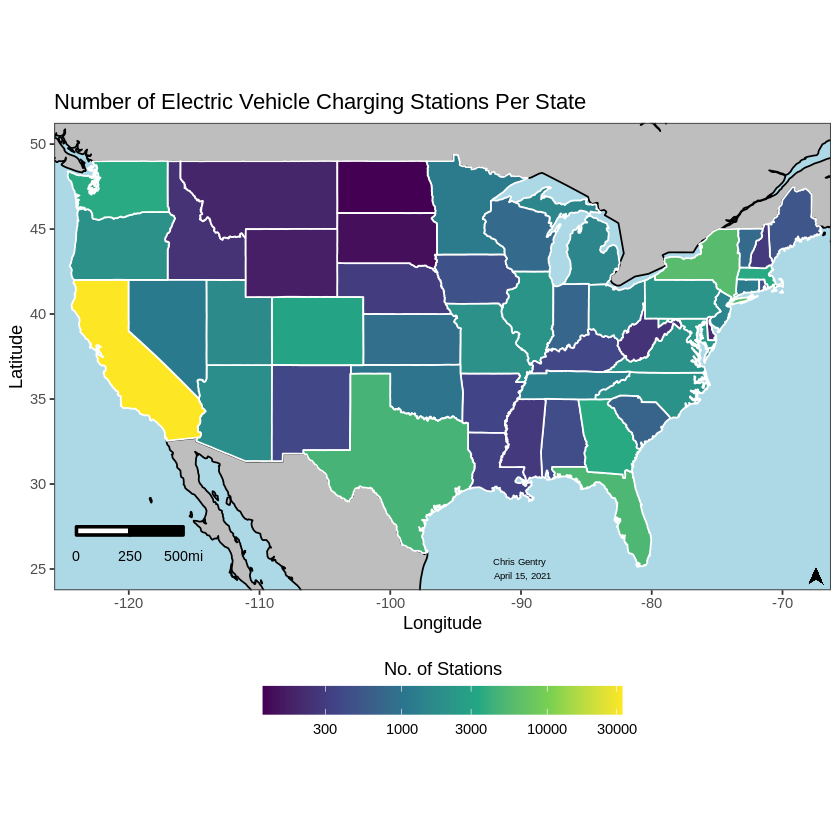

In [58]:
ggplot() + geom_polygon(data = world, aes(x=long, y=lat, group=group), fill = "gray", color = "black") +
           geom_polygon(data = states, aes(x=long, y=lat, group=group, fill = evs_count), color="white") +
           theme_bw() + labs(x="Longitude",y="Latitude", title="Number of Electric Vehicle Charging Stations Per State", fill = "No. of Stations") +
           scalebar(states, dist = 250, dist_unit = "mi", transform = TRUE, model = "WGS84", 
                    location = "bottomleft", st.dist = 0.05, st.size = 3, anchor = c(x=-124,y=27)) +
           north(states, location = "bottomright", scale = 0.05, symbol = 12, anchor = c(x=-66,y=24)) + 
           coord_fixed(xlim = c(-123,-69), ylim = c(25, 50), ratio = 1.3) +
           scale_fill_viridis_c(option = "D", trans = "log10") +
           theme(panel.background = element_rect(fill = "lightblue"), 
                 panel.grid.major = element_blank(), 
                 panel.grid.minor = element_blank(),
                 legend.position="bottom", legend.box="horizontal") +
           guides(fill=guide_colorbar(title.position="top", title.hjust = 0.5, barwidth = 15, draw.ulim = TRUE)) + 
           annotate("text", x = -90, y = 25, label = "Chris Gentry \n April 15, 2021", size = 2)

```
scale_fill_gradient2(low = "white", high = "red", trans = "log10") + 
guides(fill=guide_legend(title.position="top", title.hjust = 0.5, barwidth = 15))
```

In [116]:
tn <- map_data('county', region = "tennessee")
head(tn)

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-84.27064,35.90726,1,1,tennessee,anderson
2,-84.28782,35.93591,1,2,tennessee,anderson
3,-84.28782,35.94164,1,3,tennessee,anderson
4,-84.28782,35.95883,1,4,tennessee,anderson
5,-84.33366,36.05623,1,5,tennessee,anderson
6,-84.35085,36.07915,1,6,tennessee,anderson


In [64]:
unique(tn$subregion)

[1] "anderson"   "bedford"    "benton"     "bledsoe"    "blount"    
 [6] "bradley"    "campbell"   "cannon"     "carroll"    "carter"    
[11] "cheatham"   "chester"    "claiborne"  "clay"       "cocke"     
[16] "coffee"     "crockett"   "cumberland" "davidson"   "decatur"   
[21] "de kalb"    "dickson"    "dyer"       "fayette"    "fentress"  
[26] "franklin"   "gibson"     "giles"      "grainger"   "greene"    
[31] "grundy"     "hamblen"    "hamilton"   "hancock"    "hardeman"  
[36] "hardin"     "hawkins"    "haywood"    "henderson"  "henry"     
[41] "hickman"    "houston"    "humphreys"  "jackson"    "jefferson" 
[46] "johnson"    "knox"       "lake"       "lauderdale" "lawrence"  
[51] "lewis"      "lincoln"    "loudon"     "mcminn"     "mcnairy"   
[56] "macon"      "madison"    "marion"     "marshall"   "maury"     
[61] "meigs"      "monroe"     "montgomery" "moore"      "morgan"    
[66] "obion"      "overton"    "perry"      "pickett"    "polk"      
[71] "putnam"     "rhea"       "roane"      "robertson"  "rutherford"
[76] "scott"      "sequatchie" "sevier"     "shelby"     "smith"     
[81] "stewart"    "sullivan"   "sumner"     "tipton"     "trousdale" 
[86] "unicoi"     "union"      "van buren"  "warren"     "washington"
[91] "wayne"      "weakley"    "white"      "williamson" "wilson"

In [117]:
tornadoes <- read.csv('https://raw.githubusercontent.com/chrismgentry/GIS1-Exercise-2/main/Data/tn_tornadoes.csv')
head(tornadoes)

,County_Name,Tornado_Count
,<chr>,<int>
1,anderson,5
2,bedford,19
3,benton,21
4,bledsoe,8
5,blount,14
6,bradley,26


In [118]:
colnames(tornadoes) <- c("subregion","tornado_count")
tn_tornadoes <- inner_join(tn, tornadoes, by = "subregion")
head(tn_tornadoes)

,long,lat,group,order,region,subregion,tornado_count
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<int>
1,-84.27064,35.90726,1,1,tennessee,anderson,5
2,-84.28782,35.93591,1,2,tennessee,anderson,5
3,-84.28782,35.94164,1,3,tennessee,anderson,5
4,-84.28782,35.95883,1,4,tennessee,anderson,5
5,-84.33366,36.05623,1,5,tennessee,anderson,5
6,-84.35085,36.07915,1,6,tennessee,anderson,5


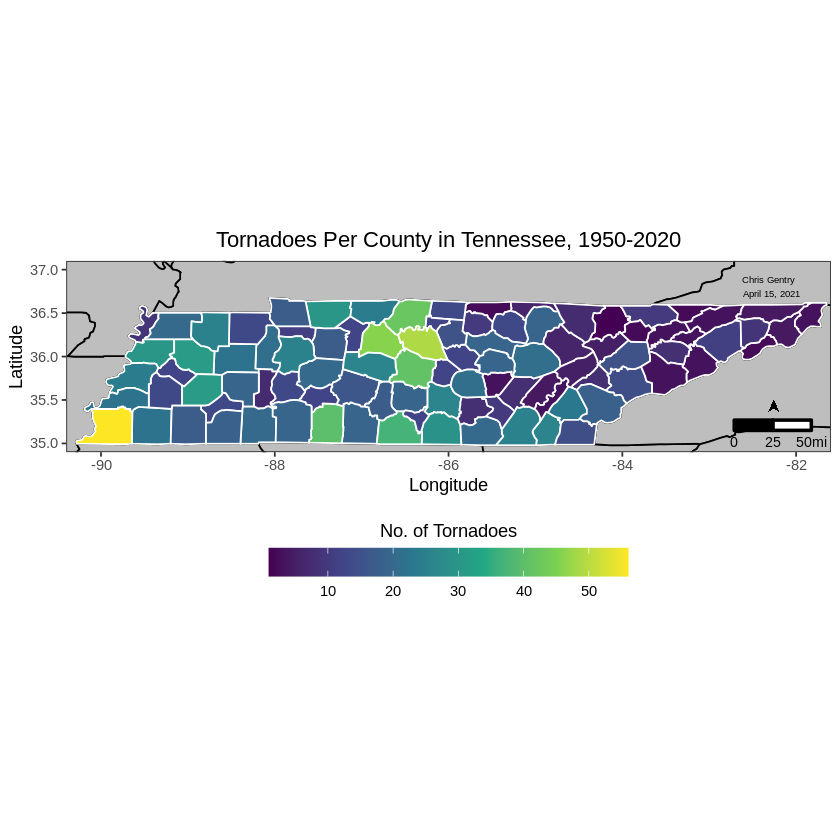

In [120]:
ggplot() + geom_polygon(data = states, aes(x=long, y=lat, group=group), fill = "gray", color = "black") +
           geom_polygon(data = tn_tornadoes, aes(x=long, y=lat, group=group, fill = tornado_count), color="white") +
           theme_bw() + labs(x="Longitude",y="Latitude", title="Tornadoes Per County in Tennessee, 1950-2020", fill = "No. of Tornadoes") + 
           scalebar(tn_tornadoes, dist = 25, dist_unit = "mi", transform = TRUE, model = "WGS84", 
                    location = "bottomright", height = 0.07, st.dist = 0.08, st.size = 3, anchor = c(x=-81.825,y=35.15)) +
           north(tn_tornadoes, location = "bottomright", scale = 0.1, symbol = 12, anchor = c(x=-81.825,y=35.35)) + 
           coord_fixed(xlim = c(-90,-82), ylim = c(35, 37)) +
           scale_fill_viridis_c(option = "D") +
           theme(panel.background = element_rect(fill = "lightblue"), 
                 panel.grid.major = element_blank(), 
                 panel.grid.minor = element_blank(),
                 legend.position="bottom", legend.box="horizontal",
                 plot.title = element_text(hjust = 0.5)) +
           guides(fill=guide_colorbar(title.position="top", title.hjust = 0.5, barwidth = 15, draw.ulim = TRUE)) + 
           annotate("text", x = -82.3, y = 36.8, label = "Chris Gentry \n April 15, 2021", size = 2)